# Базовое решение Задачи 4 "Разработка нефтегазовых месторождений"

## Считывание данных

In [1]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Считываем тренировочные данные
train = pd.read_csv("data/train_oil.csv")
test = pd.read_csv("data/oil_test.csv")

train.shape, test.shape

((309, 20), (133, 19))

In [3]:
# Посмотрим как выглядят данные
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


## Исследование и обработка данных

In [4]:
print("Number of missing values in train dataset:")
print(train.isna().sum())
print("Number of missing values in test dataset:")
print(test.isna().sum())

Number of missing values in train dataset:
Field name                         0
Reservoir unit                     0
Country                           27
Region                            38
Basin name                        38
Tectonic regime                    0
Latitude                          27
Longitude                         30
Operator company                   0
Onshore/Offshore                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64
Number of missing values in test dataset:
Field name                         0
Reservoir unit                     0
Country                           13
Region                            16
Basin name    

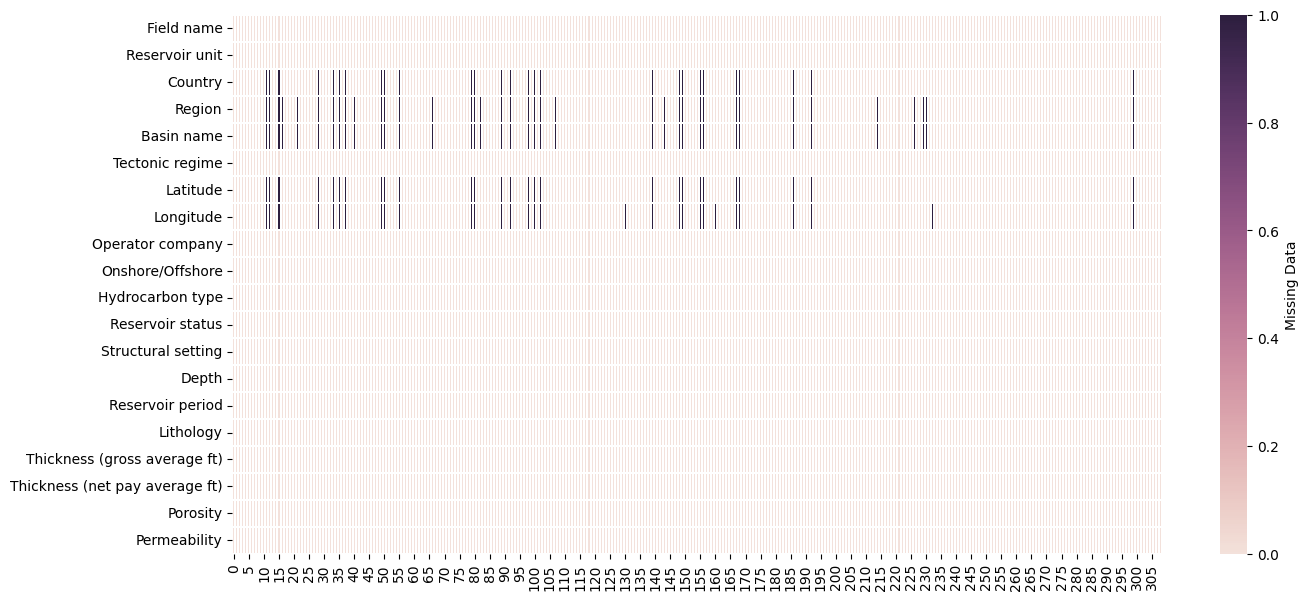

In [5]:
plt.figure(figsize=(15,7))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(train.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'}, linewidths=0.05)

plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [6]:
train.dtypes

Field name                         object
Reservoir unit                     object
Country                            object
Region                             object
Basin name                         object
Tectonic regime                    object
Latitude                          float64
Longitude                         float64
Operator company                   object
Onshore/Offshore                   object
Hydrocarbon type                   object
Reservoir status                   object
Structural setting                 object
Depth                               int64
Reservoir period                   object
Lithology                          object
Thickness (gross average ft)      float64
Thickness (net pay average ft)    float64
Porosity                          float64
Permeability                      float64
dtype: object

In [7]:
train = train.dropna()

### BoxPlot

https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21

### Распределение переменных

C:\Users\santiperro\AppData\Local\Temp\ipykernel_15912\211666446.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Depth'], ax=axes[0, 0])
d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='Porosity', ylabel='Density'>

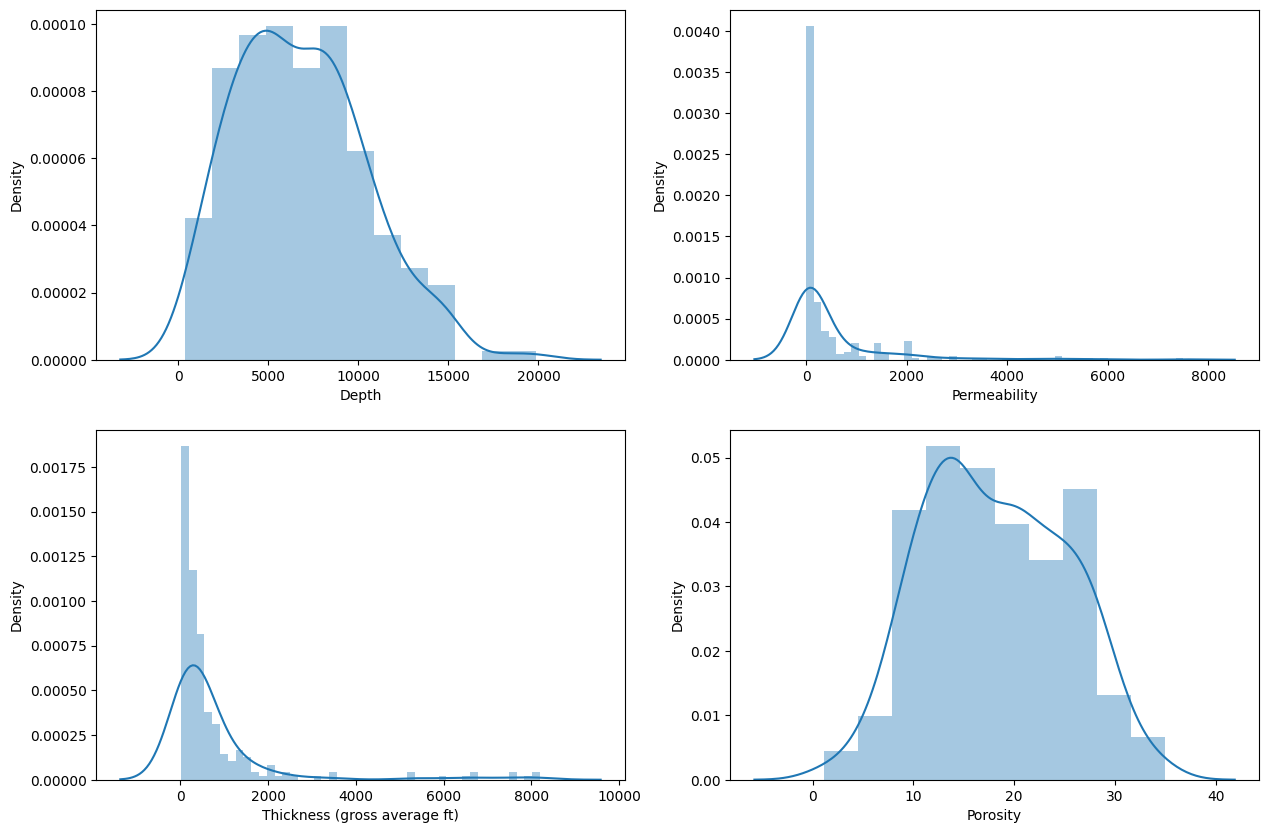

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.distplot(train['Depth'], ax=axes[0, 0])
sns.distplot(train['Permeability'], ax=axes[0, 1])
sns.distplot(train['Thickness (gross average ft)'], ax=axes[1,0])
sns.distplot(train['Porosity'], ax=axes[1, 1])

### Взаимосвязи между переменными

d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

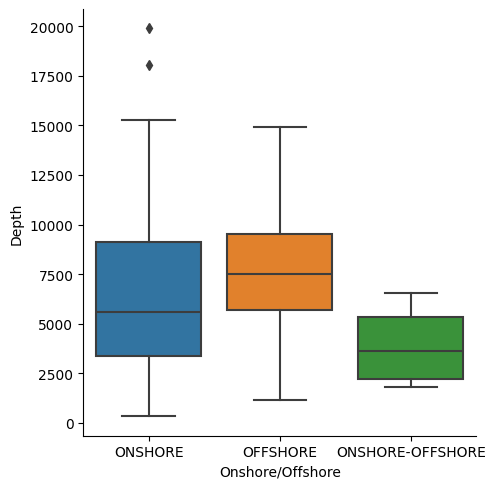

In [9]:
sns.catplot(x="Onshore/Offshore", y="Depth", kind = "box", data=train)

### Обработка категориальных признаков

In [10]:
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [11]:
train.drop(columns=["Field name", "Reservoir unit", "Country", "Basin name", "Operator company"], inplace=True)
test.drop(columns=["Field name", "Reservoir unit", "Country", "Basin name", "Operator company"], inplace=True)

In [12]:
train['Onshore/Offshore'].value_counts()

Onshore/Offshore
ONSHORE             187
OFFSHORE             77
ONSHORE-OFFSHORE      4
Name: count, dtype: int64

In [13]:
# Использую балансировку upsampling
from sklearn.utils import resample


onshore = train[train['Onshore/Offshore'] == 'ONSHORE']
offshore = train[train['Onshore/Offshore'] == 'OFFSHORE']
onshore_offshore = train[train['Onshore/Offshore'] == 'ONSHORE-OFFSHORE']

# Увеличиваем количество записей для класса 'OFFSHORE' до того же уровня, что и для класса 'ONSHORE'
offshore_upsampled = resample(offshore, replace=True, n_samples=len(onshore), random_state=42)

# Увеличиваем количество записей для класса 'ONSHORE-OFFSHORE' до того же уровня, что и для класса 'ONSHORE'
onshore_offshore_upsampled = resample(onshore_offshore, replace=True, n_samples=len(onshore), random_state=42)

# Объединяем увеличенные данные
train = pd.concat([onshore, offshore_upsampled, onshore_offshore_upsampled])

# Проверяем новое распределение классов
print(train['Onshore/Offshore'].value_counts())

Onshore/Offshore
ONSHORE             187
OFFSHORE            187
ONSHORE-OFFSHORE    187
Name: count, dtype: int64


In [14]:
# category_columns_for_get_dummies = ['Region', 'Hydrocarbon type', 'Reservoir status', 'Lithology']
category_columns_for_label_encoder = ['Tectonic regime', 'Structural setting', 'Reservoir period', 'Onshore/Offshore', 'Region', 'Hydrocarbon type', 'Reservoir status', 'Lithology']

In [15]:
from sklearn import preprocessing


# train = pd.get_dummies(train, columns=category_columns_for_get_dummies)
# test = pd.get_dummies(test, columns=category_columns_for_get_dummies)

for col in category_columns_for_label_encoder:
    le = preprocessing.LabelEncoder()
    if col != 'Onshore/Offshore':
        train[col] = le.fit_transform(train[col])
        test[col] = test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

le = preprocessing.LabelEncoder()
train['Onshore/Offshore'] = le.fit_transform(train['Onshore/Offshore'])

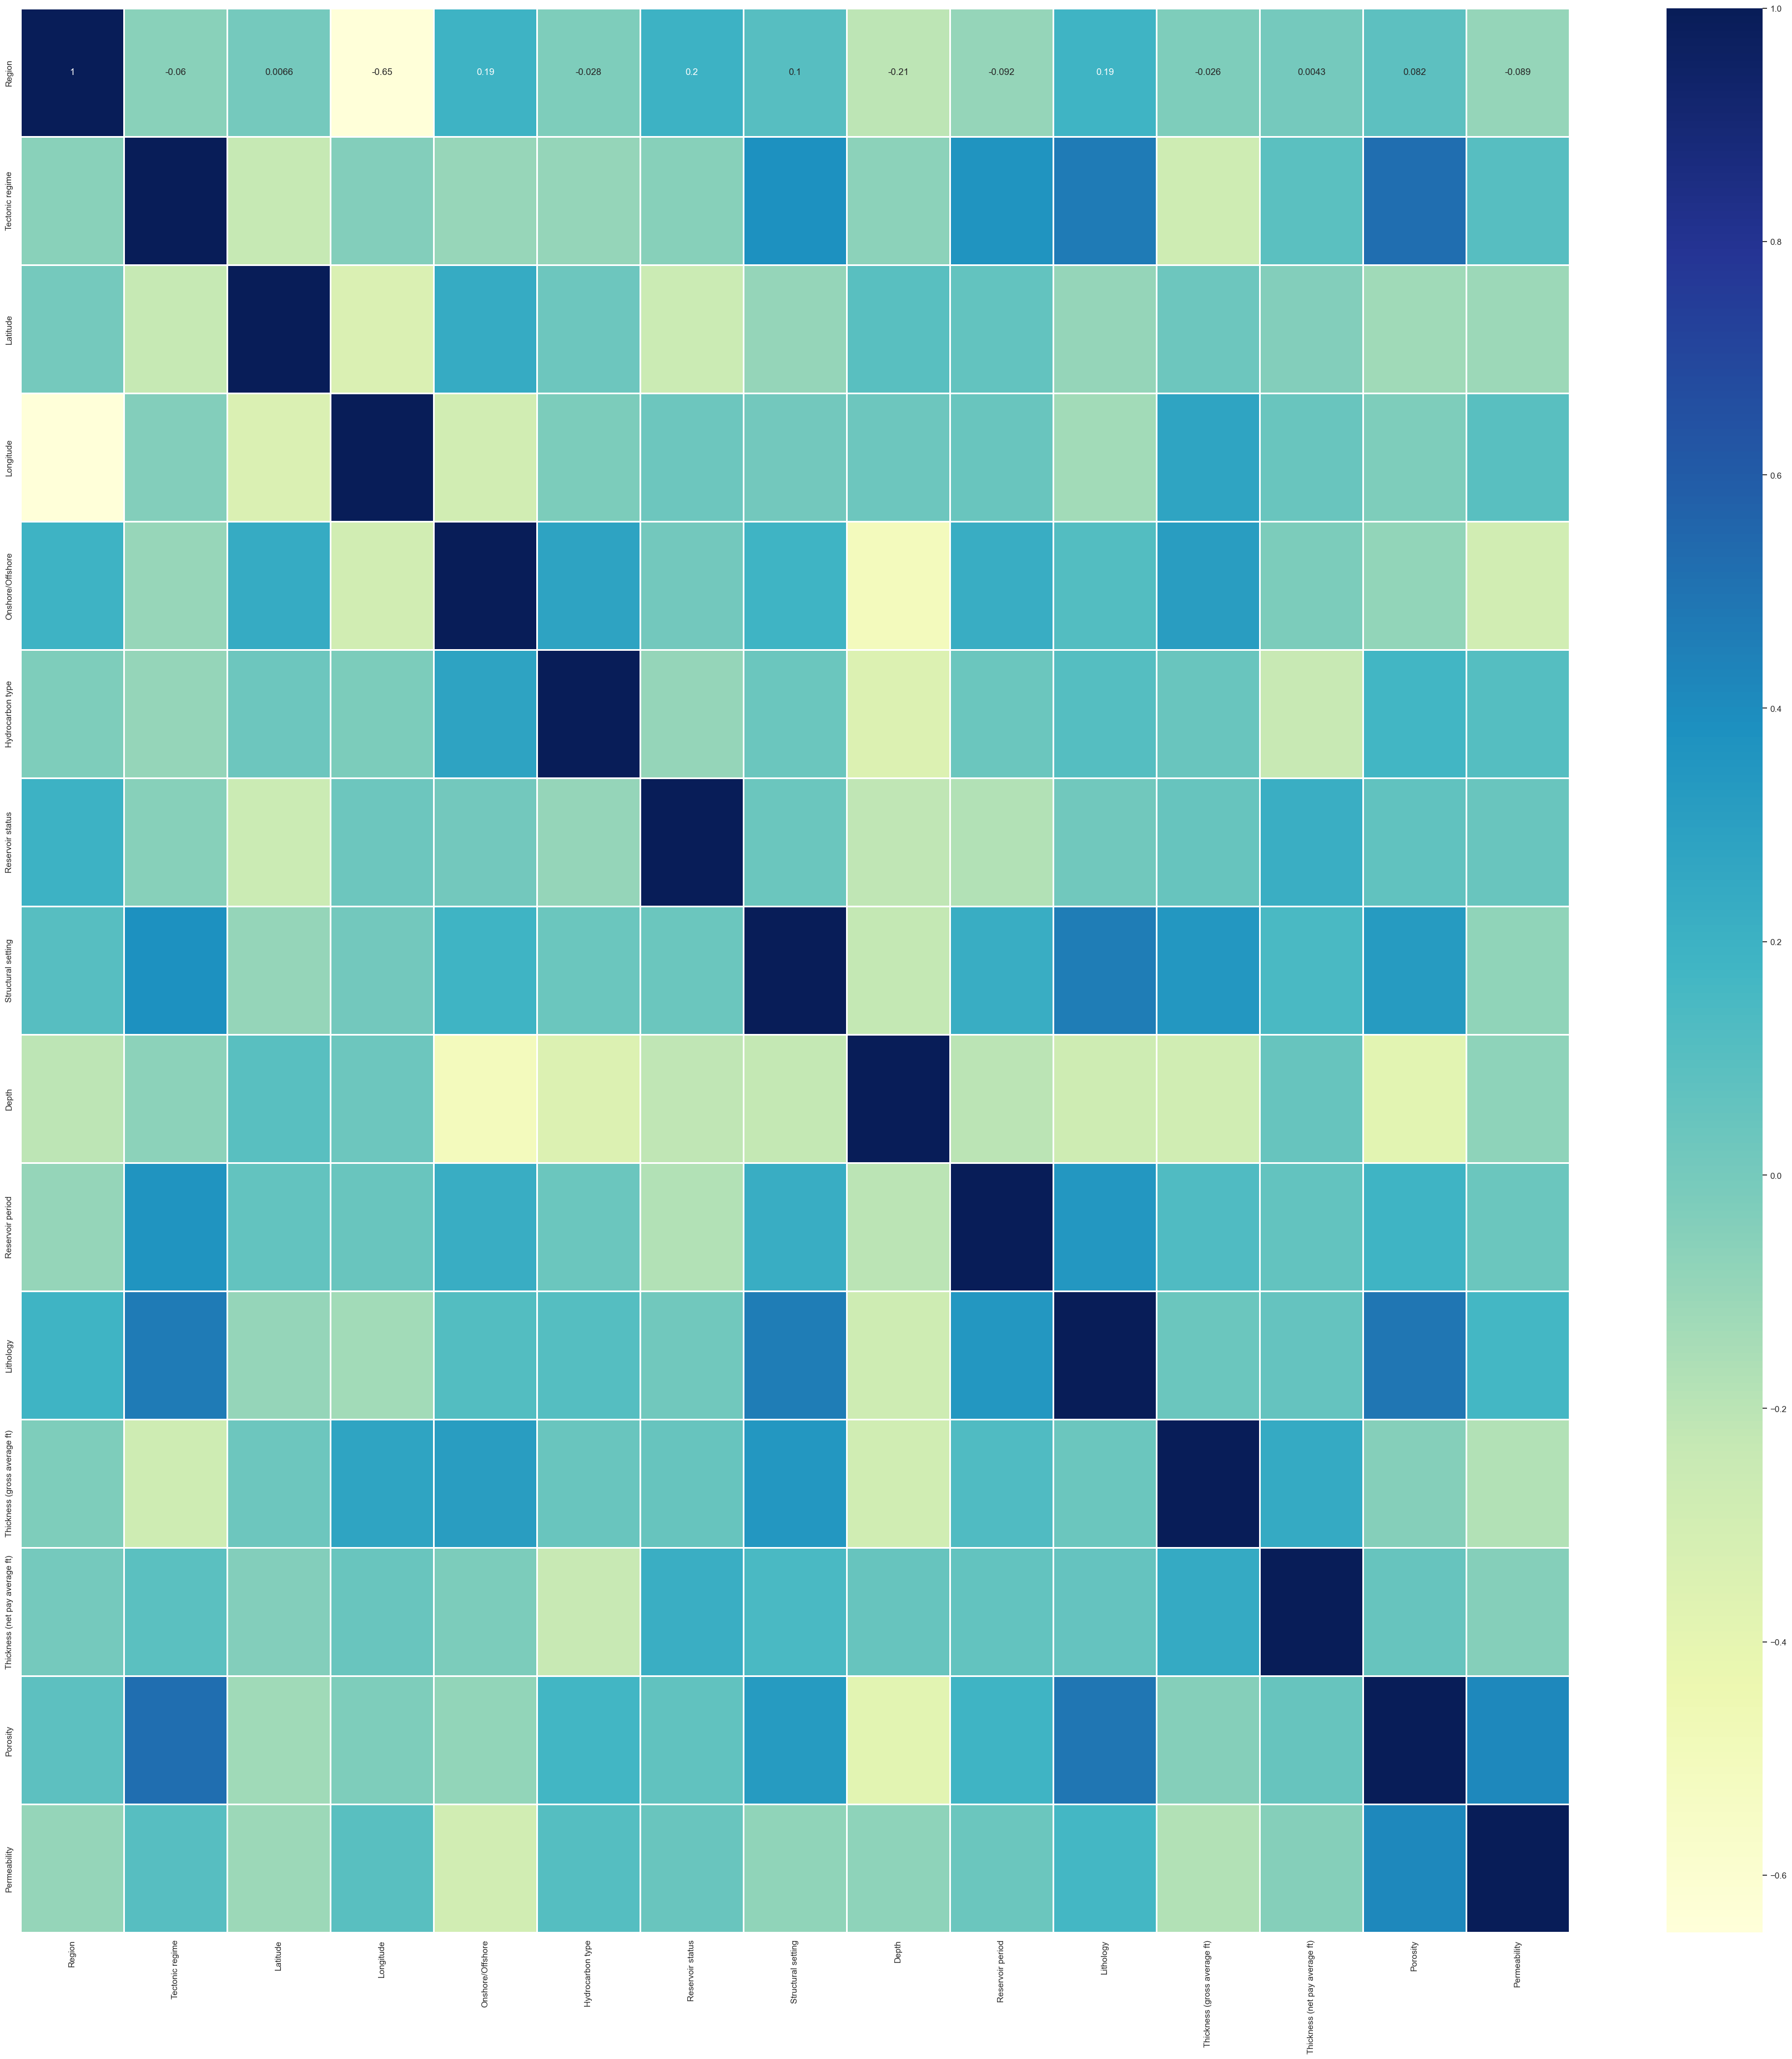

In [16]:
crr = train.corr()
sns.set(rc = {'figure.figsize':(45,45)})
sns.heatmap(crr, annot = True, cmap="YlGnBu", linecolor='white',linewidths=1)
plt.savefig("heatmap.png")

## Обучение модели

In [17]:
X = train.drop(columns=['Onshore/Offshore'])
y = train['Onshore/Offshore']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (392, 14), (392,)
Train dataset size: (169, 14), (169,)


In [19]:
from sklearn.tree import DecisionTreeClassifier

# Создадим модель дерева решений
model = DecisionTreeClassifier()

# обучение модели
model.fit(X_train, y_train)

# предсказание ответов для тестовой выборки
answers_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


print(f'Accuracy: {accuracy_score(y_test, answers_pred)}')

Accuracy: 0.9053254437869822


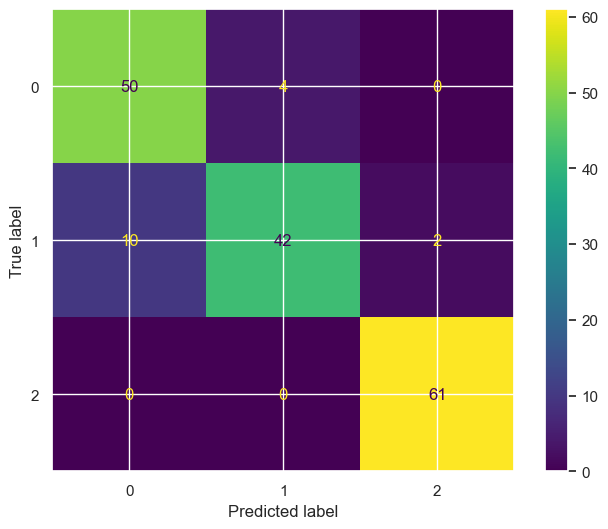

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, answers_pred)

fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)

display.plot(ax=ax)

In [22]:
result = model.predict(test)
result

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1])

In [24]:
y_pred_test = pd.DataFrame(result, columns=['Onshore/Offshore'])
y_pred_test = y_pred_test.reset_index(drop=True)
y_pred_test

,Onshore/Offshore
0,0
1,0
2,1
3,0
4,1
...,...
128,0
129,1
130,1
131,1


In [25]:
inverse_mapping = dict(zip(range(len(le.classes_)), le.classes_))

# Раскодирование обратно
y_pred_test["Onshore/Offshore"] = y_pred_test["Onshore/Offshore"].map(inverse_mapping)
y_pred_test

,Onshore/Offshore
0,OFFSHORE
1,OFFSHORE
2,ONSHORE
3,OFFSHORE
4,ONSHORE
...,...
128,OFFSHORE
129,ONSHORE
130,ONSHORE
131,ONSHORE


In [26]:
y_pred_test.to_csv("predict.csv", index=False)